In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,   # 0에서 8:2, 1에서 8:2, 2에서 8:2로 각각 비율을 맞춰주는 옵션
                                                    random_state=13)

In [5]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [8]:
import numpy as np

np.unique(y_test, return_counts=True) # 위에 stratify를 넣어서 0,1,2를 10개씩으로 비율 맞춰줌


(array([0, 1, 2]), array([10, 10, 10]))

In [9]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

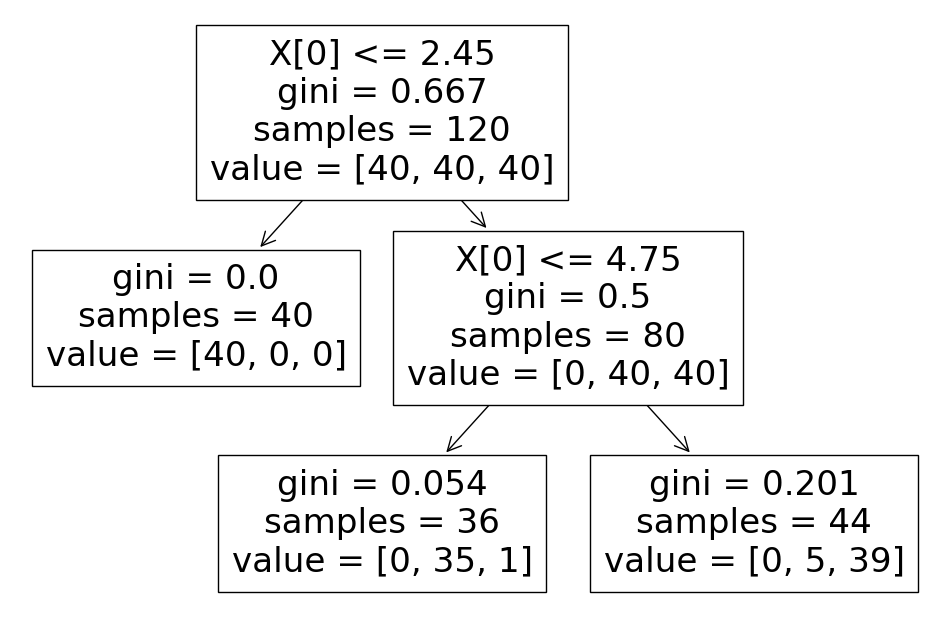

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(iris_tree);

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:]) # 예측해보기
accuracy_score(iris.target, y_pred_tr)

0.9533333333333334

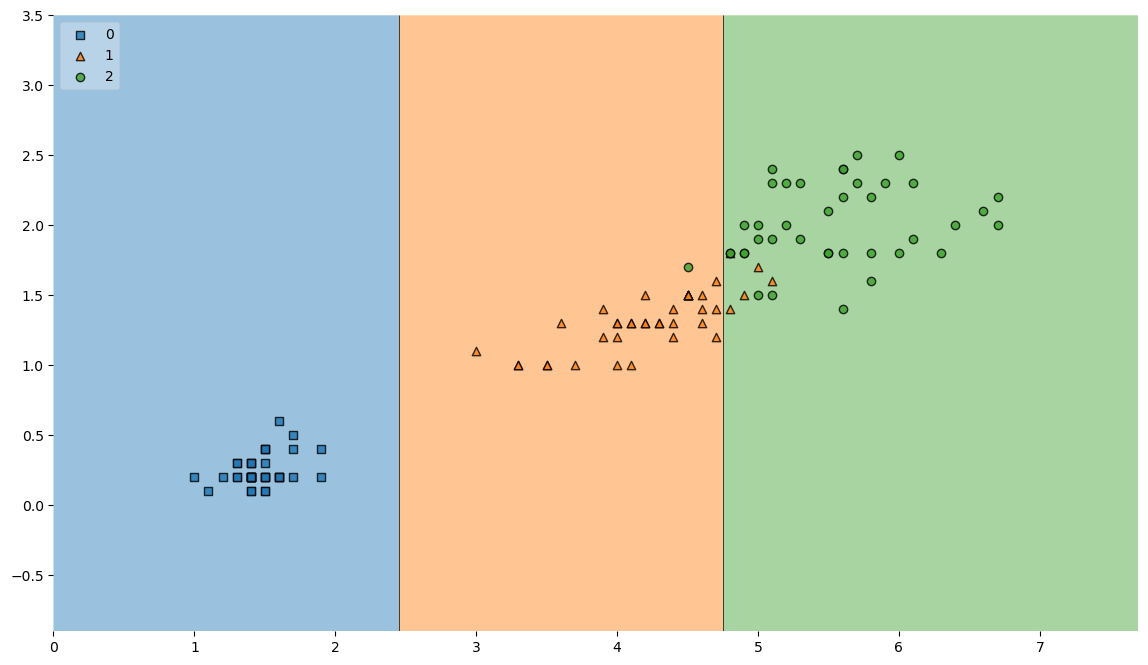

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

In [13]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

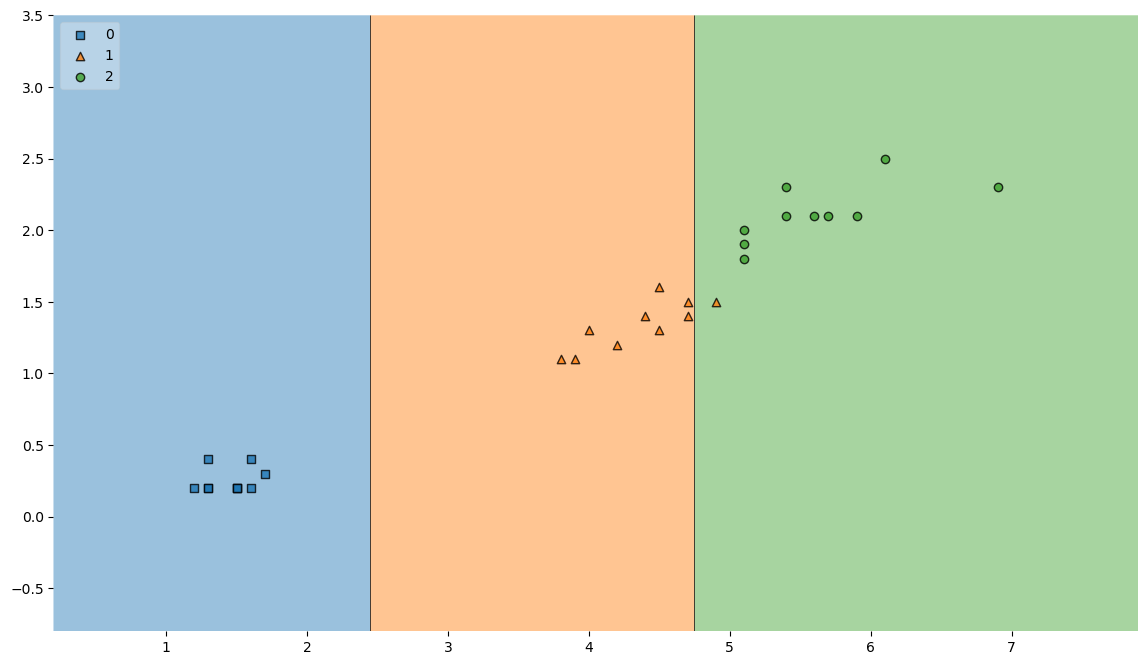

In [14]:
plt.figure(figsize=(14,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

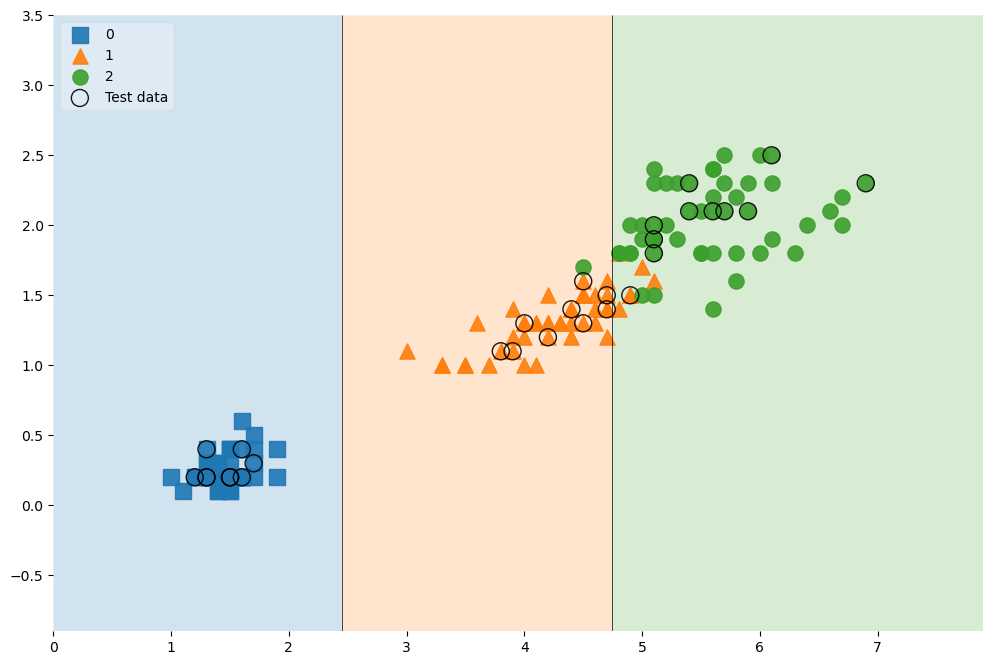

In [16]:
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9} # alpha : 투명도
scatter_kwargs = {'s':120, 'edgecolor': None, 'alpha':0.9}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha':0.2}
                     );

In [19]:
# 전체 데이터를 features로 설정

features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,   
                                                    random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

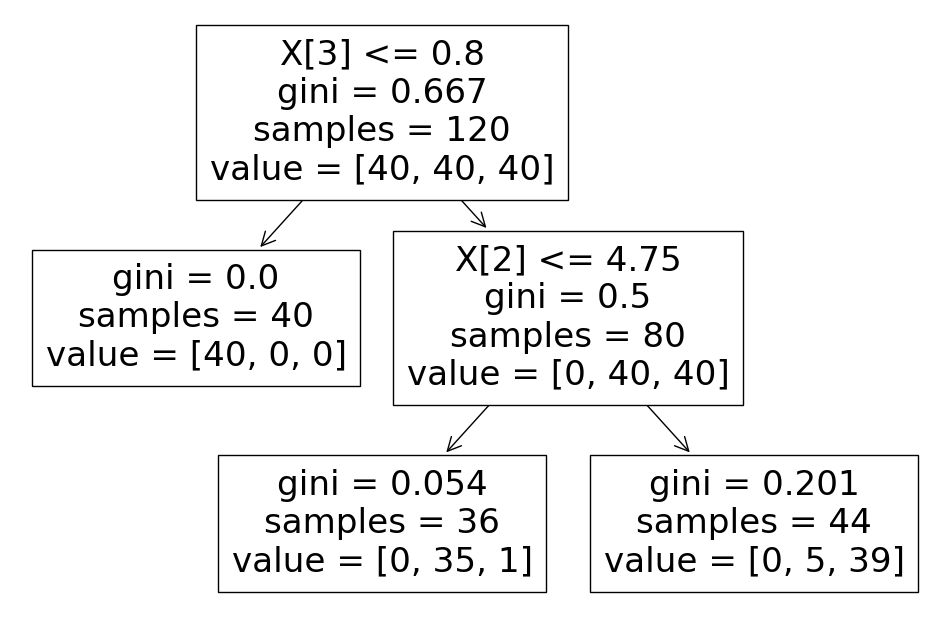

In [18]:
plt.figure(figsize=(12,8))
plot_tree(iris_tree);

In [20]:
test_data = np.array([[4.3, 2., 1.2, 1.]])
iris_tree.predict(test_data)

array([1])

In [21]:
# test_data가 1번(versicolor)로 나왔지만 그 확률을 보고싶음

iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [26]:
# zip, 리스트를 튜플로

list1 = ['a','b','c']
list2 = [1,2,3]


In [27]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [28]:
# 튜플을 딕셔너리로

dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [29]:
# 풀고싶을때

x,y = zip(*pairs)

In [30]:
x

('a', 'b', 'c')

In [31]:
y

(1, 2, 3)

In [32]:
list(x)

['a', 'b', 'c']

In [33]:
list(y)

[1, 2, 3]